#### 贪心算法

* 贪心算法，并不总总是最优解
  * 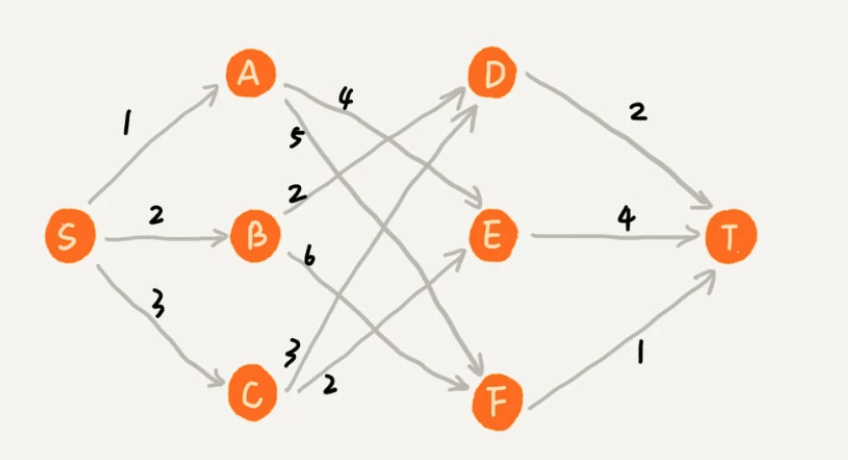
  * 贪心算法的解决思路是，每次都选择一条跟当前顶点相连的权最小的边，直到找到顶点 T。按照这种思路，我们求出的最短路径是 S->A->E->T，路径长度是 1+4+4=9
  * 贪心算法不工作的主要原因是，前面的选择，会影响后面的选择。如果我们第一步从顶点 S 走到顶点 A，那接下来面对的顶点和边，跟第一步从顶点 S 走到顶点 B，是完全不同的

#### 霍夫曼编码

假设我们通过统计分析发现，这 1000 个字符中只包含 6 种不同字符，假设它们分别是 a、b、c、d、e、f。而 3 个二进制位（bit）就可以表示 8 个不同的字符，所以，为了尽量减少存储空间，每个字符我们用 3 个二进制位来表示。那存储这 1000 个字符只需要 3000bits 就可以了，比原来的存储方式节省了很多空间。不过，还有没有更加节省空间的存储方式呢？

~~~
a(000)、b(001)、c(010)、d(011)、e(100)、f(101)
~~~

霍夫曼编码实现思路：
* 考察文本中有多少个不同字符及每个字符出现的频率
  * 根据频率的不同，选择不同长度的编码。
* 霍夫曼编码试图用这种不等长的编码方法，来进一步增加压缩的效率。
* 根据贪心的思想，可以把出现频率比较多的字符，用稍微短一些的编码；出现频率比较少的字符，用稍微长一些的编码。

解压缩：
* 对于等长的编码来说，我们解压缩起来很简单。比如刚才那个例子中，我们用 3 个 bit 表示一个字符。在解压缩的时候，我们每次从文本中读取 3 位二进制码，然后翻译成对应的字符。
* 但是，霍夫曼编码是不等长的，每次应该读取 1 位还是 2 位、3 位等等来解压缩呢？这个问题就导致霍夫曼编码解压缩起来比较复杂。
* *为了避免解压缩过程中的歧义，霍夫曼编码要求各个字符的编码之间，不会出现某个编码是另一个编码前缀的情况*。

假设这 6 个字符出现的频率从高到低依次是 a、b、c、d、e、f。我们把它们编码下面这个样子，任何一个字符的编码都不是另一个的前缀，在解压缩的时候，我们每次会读取尽可能长的可解压的二进制串，所以在解压缩的时候也不会歧义。经过这种编码压缩之后，这 1000 个字符只需要 2100bits 就可以了
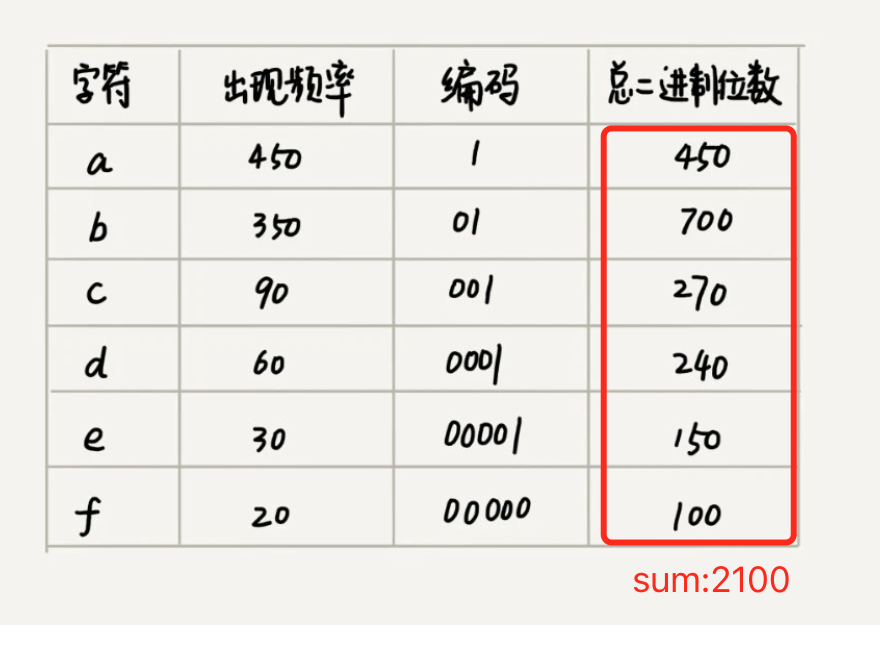


如何根据字符出现的频率给不同的字符进行不同长度的编码：
1. 把每个字符看作一个节点，并且附带着把频率放到优先级队列中
2. 从队列中取出频率最小的两个节点 f、e，
3. 然后新建一个节点 X，把频率设置为两个节点的频率之和，并把这个新节点 X 作为节点 f、e 的父节点
4. 最后再把 X 节点放入到优先级队列中
5. 重复这个过程，直到队列中没有数据
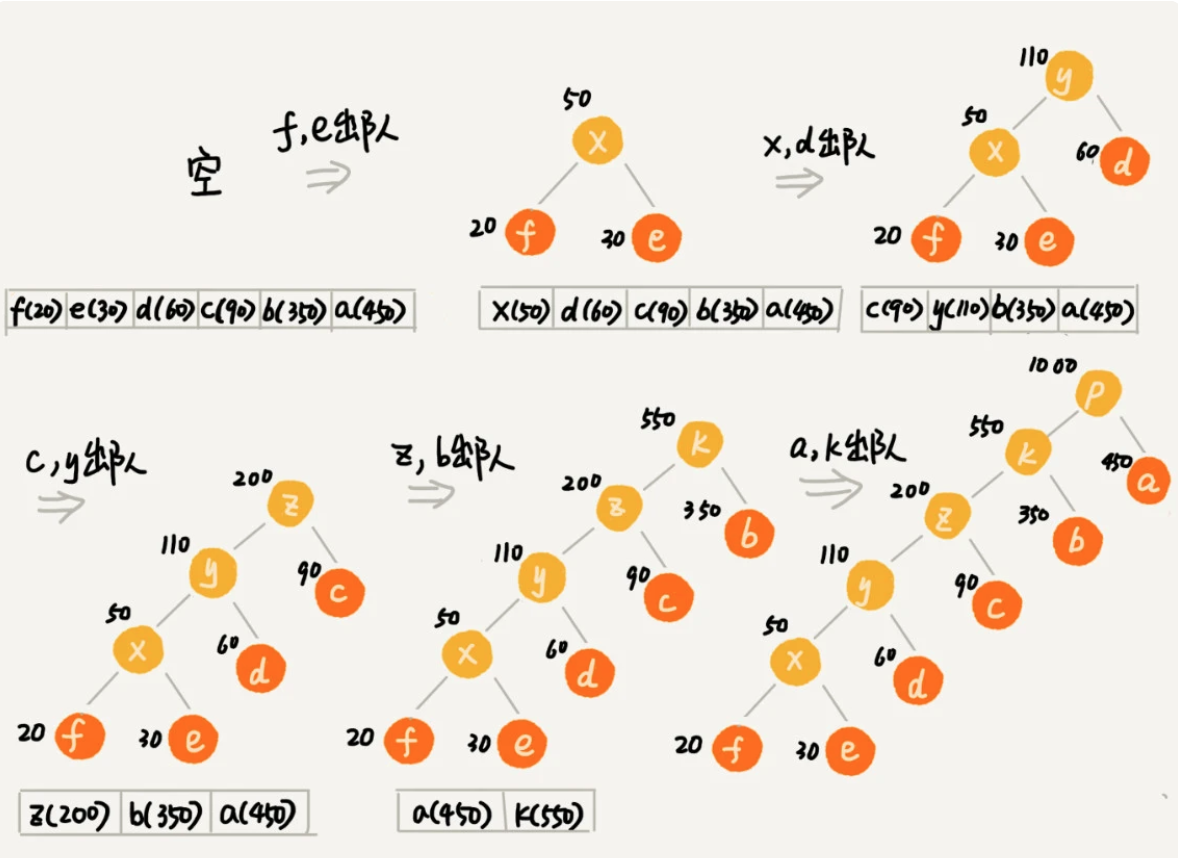
6. 每一条边加上画一个权值，指向左子节点的边我们统统标记为 0，指向右子节点的边，我们统统标记为 1，
7. 那从根节点到叶节点的路径就是叶节点对应字符的霍夫曼编码
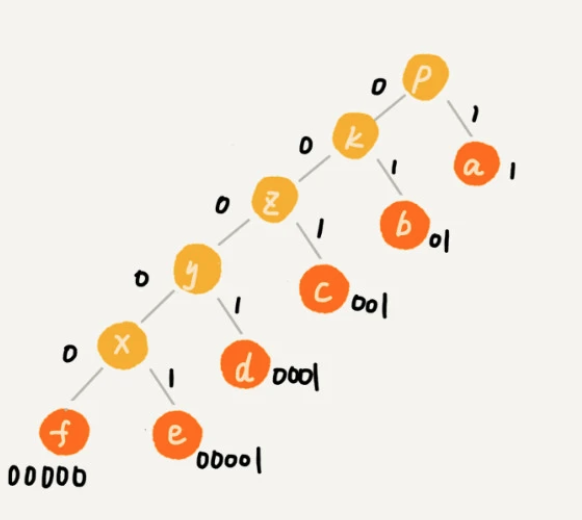



In [ ]:
'''
121. Best Time to Buy and Sell Stock easy

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
'''

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_profile = 0
        min_price = prices[0]

        for price in prices[1:]:
            min_price = min(price, min_price)
            max_profile = max(price-min_price, max_profile)
        
        return max_profile


In [ ]:
'''
122. Best Time to Buy and Sell Stock II Medium

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 7
Explanation: Buy on day 2 (price = 1) and sell on day 3 (price = 5), profit = 5-1 = 4.
Then buy on day 4 (price = 3) and sell on day 5 (price = 6), profit = 6-3 = 3.
Total profit is 4 + 3 = 7.
'''

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        profit = 0
        
        # 只要后面一天的价格是涨的，就买入并卖出
        # 每次只能持有一股，并且可以多次进行买入卖出的操作
        # 1 2 3 4
        # 1 < 2，1买入2卖出
        # 2 < 3，2买入3卖出
        for i in range(len(prices)-1):
            if prices[i+1] > prices[i]:
                profit += prices[i+1]- prices[i]
        
        return profit
        